# Práctica 4 - Generación de Informes

Este dataset almacena información de acceso al sitio web de Dataiku, durante 2 meses. Contiene
información sobre cada vista de página individual en el sitio web www.Dataiku.com


## Estructura del Dataset
El dataset, está en un fichero csv con 18 campos:

• server_ts: fecha de conexión al servidor \\
• client_ts: fecha de conexión del usuario \\
• client_addr: dirección IP del usuario \\
• visitor_id: id asignado al usuario (~ _utma) \\
• session_id: id de la sesión/visita (~ _utmb) \\
• location: url de la página a la que se accede \\
• referer: url de la página desde la que se accedió a location. Si está vacío se considera una búsqueda directa \\
• user_agent: navegador desde el que se conectó el usuario \\
• type: tipo de acceso \\
• br_width: ancho del navegador del usuario \\
• br_height: alto del navegador del usuario \\
• sc_width: ancho de la pantalla del usuario (resolución) \\
• sc_height: alto de la pantalla del usuario (resolución) \\
• br_lan: idioma del navegador del usuario \\
• tz_off: time zona. El número indica la diferencia en minutos con la hora GMT. -60 indica zona horaria GMT+1 y 60 indica zona horaria GMT-1



A partir de los datos del dataset anterior, generar informes para, en base a dichos datos, poder tomar las
siguientes decisiones:

• Qué idiomas debería soportar el sitio web

• Se quiere sacar una promoción durante un tiempo muy limitado. Qué hora sería la más adecuada para llegar a un mayor número de usuarios.

• Podemos decidir promocionarnos en los enlaces que vienen de serie con los navegadores. En qué navegador sería más interesante hacernos publicidad.

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Cargar dataset
df = pd.read_csv('LogsDataiku.csv')

### ¿Qué idiomas debería soportar?

Podemos analizar la columna br_lan que indica el idioma en el que está el navegador del usuario. Si sacamos una lista de todos los idiomas del navegador, podemos conocer qué idiomas hablan nuestros usuarios. Sacaremos los 10 idiomas más hablados

In [5]:
top_languages = df['br_lang'].value_counts().head(10)
print("Idiomas más comunes entre los usuarios:")
print(top_languages)

Idiomas más comunes entre los usuarios:
br_lang
fr       5033
en-US    2927
fr-fr     748
en-us     668
en-GB     360
fr-FR     267
en        116
pt-BR     102
ru         73
zh-CN      60
Name: count, dtype: int64


Si agrupamos por el idioma y quitamos el dialecto obtenemos que:

In [6]:
top_languages = df['br_lang'].value_counts()
# Agrupar idiomas por la primera parte antes del -
top_languages = top_languages.groupby(lambda x: x.split('-')[0]).sum()
# Ordenar de mayor a menor
top_languages = top_languages.sort_values(ascending=False)
print("Idiomas utilizados entre los usuarios:")
print(top_languages)

Idiomas utilizados entre los usuarios:
br_lang
fr       6049
en       4151
pt        104
de         90
zh         89
es         87
ru         80
ja         56
pl         24
nl         21
ca         15
tr         14
da         12
cs          9
it          8
bg          7
he          6
th          5
id          4
nb          3
C           2
en_US       2
sk          2
ko          2
hu          2
el          1
fa          1
fi          1
hr          1
sv          1
Name: count, dtype: int64


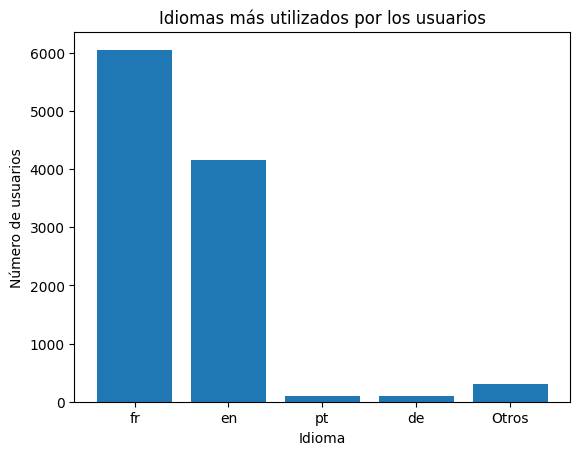

In [34]:
import matplotlib.pyplot as plt
# Hacemos un grafico de barras que agrupe en Otros los idiomas que tengan menos de 50 instancias
other_languages = top_languages[top_languages < 90]
top_languages = top_languages[top_languages >= 90]
top_languages['Otros'] = other_languages.sum()

# Utilizamos las banderas de los emojis para ponerlas en el eje X

plt.bar(top_languages.index, top_languages.values)
plt.xlabel('Idioma')
plt.ylabel('Número de usuarios')
plt.title('Idiomas más utilizados por los usuarios')
plt.show()

Viendo los resultados, el idioma que más se utiliza es el francés seguido del inglés. Por lo que deberíamos priorizar estos dos idiomas.

Por otro lado también hay un pequeño porcentaje de usuarios que hablan portugués, po lo que podríamos tenerlo en cuenta también.

### ¿Qué hora sería la más adecuada para llegar a un mayor número de usuarios?

Para este ejercicio podemos utilizar la columna *client_ts* (fecha de conexión del usuario) para determinar en qué horas del día se registra un mayor número de visitas al sitio web.

Calcularemos la cantidad de visitas en cada hora del día y seleccionaremos la hora con el pico más alto de visitas como el momento más adecuado para llegar a los usuarios.

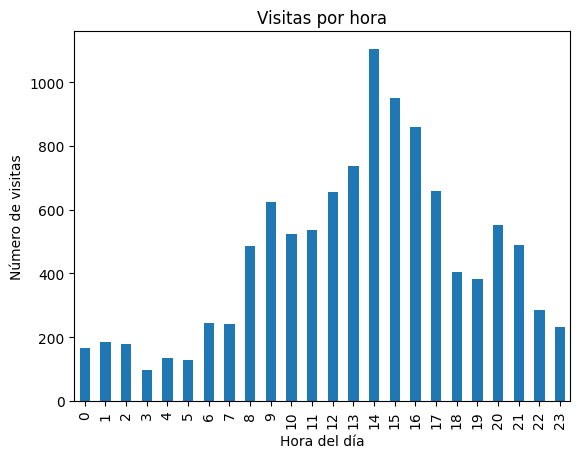


Hora más adecuada para lanzar una promoción: 14 hrs


In [10]:
# Hora más adecuada para llegar a un número mayor de usuarios
df['client_ts'] = pd.to_datetime(df['client_ts'])
hourly_visits = df['client_ts'].dt.hour.value_counts()

# Mostramos el grafico de visitas por horas
import matplotlib.pyplot as plt

# Ordenamos el eje x
hourly_visits = hourly_visits.sort_index()

hourly_visits.plot(kind='bar')
plt.xlabel('Hora del día')
plt.ylabel('Número de visitas')
plt.title('Visitas por hora')
plt.show()

best_hour = hourly_visits.idxmax()
print("\nHora más adecuada para lanzar una promoción:", best_hour, "hrs")

Como vemos en la gráfica el número de usuarios que hay a las 14:00hs es mucho mayor que en el resto de horas, por lo que nos convendría utilizar esa hora para llegar a más usuarios.

### ¿En qué navegador sería más interesante hacernos publicidad?

Con la columna referer podemos identificar los navegadores desde los cuales se originan los enlaces de referencia.

 Luego, calcularemos la proporción de visitas que provienen de cada navegador y podremos quedarnos con el navegador con mayor proporción de visitas.

In [26]:
referer_browser = df['referer']
browser_traffic = referer_browser.value_counts(normalize=True)

# Eliminamos los registros que contengan "daiku" en la url ya que no nos interesa
browser_traffic = browser_traffic[~browser_traffic.index.str.contains('dataiku')]

print("\nTráfico por navegador:")
print(browser_traffic.head(10))


Tráfico por navegador:
referer
https://www.google.fr/                                                                        0.044061
https://www.google.com/                                                                       0.030448
http://www.journaldunet.com/solutions/expert/56923/les-algorithmes-bientot-obsoletes.shtml    0.022031
http://www.datatau.com/                                                                       0.005819
https://www.google.co.in/                                                                     0.004988
https://www.google.co.uk/                                                                     0.004365
http://forum.gephi.org/viewtopic.php?t=2245                                                   0.003533
http://strata.oreilly.com/2013/11/data-wrangling-gets-a-fresh-look.html                       0.002806
http://strataconf.com/strata2014/public/schedule/detail/33474                                 0.002494
http://www.kdnuggets.com/software/suites.

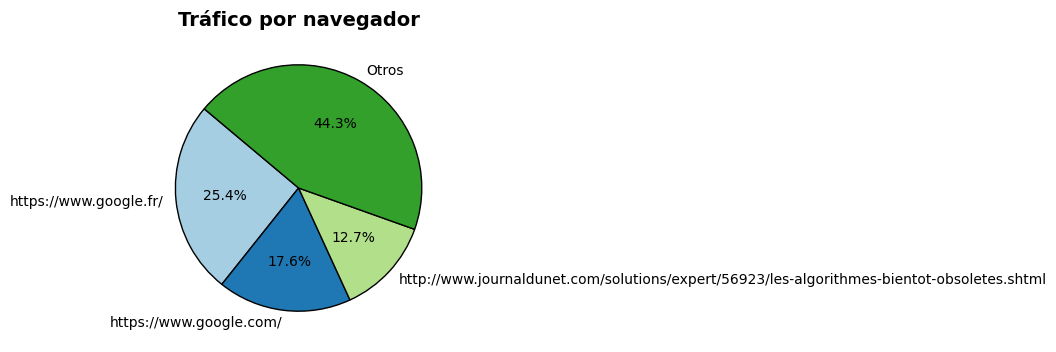

In [29]:
import matplotlib.pyplot as plt

# Definir colores y mejorar el diseño
colors = plt.cm.Paired.colors  # Paleta de colores atractiva

# Filtrar navegadores con más del 5% de tráfico
browser_traffic_filtered = browser_traffic[browser_traffic > 0.02]

# Sumar los que tienen menos del 5% en una categoría "Otros"
otros = browser_traffic[browser_traffic <= 0.02].sum()
if otros > 0:
    browser_traffic_filtered["Otros"] = otros

# Crear el gráfico de tarta con mejor diseño
plt.figure(figsize=(4, 4))
plt.pie(browser_traffic_filtered, labels=browser_traffic_filtered.index, autopct='%1.1f%%',
        colors=colors, wedgeprops={'edgecolor': 'black'}, startangle=140)

plt.title('Tráfico por navegador', fontsize=14, fontweight='bold')
plt.show()


Si eliminamos el tráfico interno podemos ver que los navegadores que más se usa es el de google de origen francés (.fr) o general (.com).

He agrupado el resto de sitios en "otros" que tienen un trafico menor al 0.02 del total